#Loading data and basic EDA

In [ ]:
# read & manipulate data
import pandas as pd 
import numpy as np
import tensorflow as tf

# visualisations
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
%matplotlib inline

In [ ]:
# misc
import random as rn
from collections import Counter

# manual parameters
RANDOM_SEED = 42

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/cicids2017 dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df2 = pd.read_csv("/content/drive/MyDrive/cicids2017 dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df3 = pd.read_csv("/content/drive/MyDrive/cicids2017 dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv")
df4 = pd.read_csv("/content/drive/MyDrive/cicids2017 dataset/Monday-WorkingHours.pcap_ISCX.csv")
df5 = pd.read_csv("/content/drive/MyDrive/cicids2017 dataset/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df6 = pd.read_csv("/content/drive/MyDrive/cicids2017 dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df7 = pd.read_csv("/content/drive/MyDrive/cicids2017 dataset/Tuesday-WorkingHours.pcap_ISCX.csv")
df8 = pd.read_csv("/content/drive/MyDrive/cicids2017 dataset/Wednesday-workingHours.pcap_ISCX.csv")

In [ ]:
df1.head(5)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
df2.head(5)

In [ ]:
df3.head(5)

In [ ]:
df4.head(5)

In [ ]:
df5.head(5)

In [ ]:
df6.head(5)

In [ ]:
df7.head(5)

In [ ]:
df8.head(5)

In [ ]:
ls = [df1, df2, df3, df4, df5, df6, df7, df8]
for i in range(len(ls)):
  df = ls[i]
  print(f'Shape: {df.shape}. Attack Type {df[" Label"].unique()}')

Shape: (225745, 79). Attack Type ['BENIGN' 'DDoS']
Shape: (286467, 79). Attack Type ['BENIGN' 'PortScan']
Shape: (191033, 79). Attack Type ['BENIGN' 'Bot']
Shape: (529918, 79). Attack Type ['BENIGN']
Shape: (288602, 79). Attack Type ['BENIGN' 'Infiltration']
Shape: (170366, 79). Attack Type ['BENIGN' 'Web Attack � Brute Force' 'Web Attack � XSS'
 'Web Attack � Sql Injection']
Shape: (445909, 79). Attack Type ['BENIGN' 'FTP-Patator' 'SSH-Patator']
Shape: (692703, 79). Attack Type ['BENIGN' 'DoS slowloris' 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye'
 'Heartbleed']


Joining the day-wise dataset into single dataset

In [ ]:
for df in ls:
  cols = df.columns.to_list()
  for i in range(len(cols)):
    cols[i] = cols[i].strip()
  df.columns = cols

In [ ]:
df = pd.concat(ls)
assert df.shape[1] == 79
df.head(3)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
df.shape

(2830743, 79)

In [ ]:
Counter(df["Label"])

Counter({'BENIGN': 2273097,
         'Bot': 1966,
         'DDoS': 128027,
         'DoS GoldenEye': 10293,
         'DoS Hulk': 231073,
         'DoS Slowhttptest': 5499,
         'DoS slowloris': 5796,
         'FTP-Patator': 7938,
         'Heartbleed': 11,
         'Infiltration': 36,
         'PortScan': 158930,
         'SSH-Patator': 5897,
         'Web Attack � Brute Force': 1507,
         'Web Attack � Sql Injection': 21,
         'Web Attack � XSS': 652})

#Missing data


In [ ]:
# Check for missing data
print(f"Missing values: {df.isnull().sum().sum()}")

# Check for infinite values, replace with NAN so it is easy to remove them
df.replace([np.inf, -np.inf], np.nan, inplace=True)
print(f"Missing values: {df.isnull().sum().sum()}")

Missing values: 1358
Missing values: 5734


In [ ]:
#Checking which columns shows the missing and infinite values
deleteCol = []
for column in df.columns:
    if df[column].isnull().values.any():
        deleteCol.append(column)
for column in deleteCol:
    print(column)

Flow Bytes/s
Flow Packets/s


In [ ]:
# droping missing values
df.dropna(inplace = True)

#Changing datatype

In [ ]:
for column in df.columns:
    if df[column].dtype == np.int64:
        maxVal = df[column].max()
        if maxVal < 120:
            df[column] = df[column].astype(np.int8)
        elif maxVal < 32767:
            df[column] = df[column].astype(np.int16)
        else:
            df[column] = df[column].astype(np.int32)
            
    if df[column].dtype == np.float64:
        maxVal = df[column].max()
        minVal = df[df[column]>0][column]
        if maxVal < 120 and minVal>0.01 :
            df[column] = df[column].astype(np.float16)
        else:
            df[column] = df[column].astype(np.float32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2827876 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int32  
 1   Flow Duration                int32  
 2   Total Fwd Packets            int32  
 3   Total Backward Packets       int32  
 4   Total Length of Fwd Packets  int32  
 5   Total Length of Bwd Packets  int32  
 6   Fwd Packet Length Max        int16  
 7   Fwd Packet Length Min        int16  
 8   Fwd Packet Length Mean       float32
 9   Fwd Packet Length Std        float32
 10  Bwd Packet Length Max        int16  
 11  Bwd Packet Length Min        int16  
 12  Bwd Packet Length Mean       float32
 13  Bwd Packet Length Std        float32
 14  Flow Bytes/s                 float32
 15  Flow Packets/s               float32
 16  Flow IAT Mean                float32
 17  Flow IAT Std                 float32
 18  Flow IAT Max                 int32  
 19  F

#Statistics of the features

In [ ]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2827876.0,2.827876e+06,2827876.0,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2827876.0,2827876.0,2827876.0,2827876.0,2827876.0,2827876.0,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2827876.0,2.827876e+06,2.827876e+06,2.827876e+06
mean,8.061534e+03,1.480065e+07,9.368972e+00,1.040396e+01,5.498522e+02,1.617903e+04,2.078044e+02,1.872929e+01,5.813437e+01,6.894233e+01,8.717304e+02,4.108922e+01,3.052037e+02,3.353267e+02,1.489598e+06,7.082522e+04,1.295195e+06,2.917187e+06,9.191785e+06,1.625442e+05,1.449765e+07,2.609978e+06,3.269065e+06,9.052107e+06,1.022929e+06,9.903861e+06,1.804992e+06,1.485162e+06,4.689442e+06,9.682420e+05,4.639595e-02,0.0,1.113910e-04,0.0,-7.798240e+03,-2.275588e+03,6.396668e+04,6.994380e+03,1.644888e+01,9.513591e+02,1.716321e+02,2.946027e+02,4.852409e+05,3.528266e-02,4.639595e-02,2.425849e-04,2.982836e-01,3.153147e-01,9.482948e-02,1.113910e-04,2.436458e-04,6.838443e-01,1.919704e+02,5.813437e+01,3.052037e+02,-7.798240e+03,0.0,0.0,0.0,0.0,0.0,0.0,9.368972e+00,5.498417e+02,1.040396e+01,1.617869e+04,6.992389e+03,1.988290e+03,5.423519e+00,2.612214e+01,8.165874e+04,4.117514e+04,1.533378e+05,5.835492e+04,8330531.0,5.040686e+05,8.704568e+06,7.928061e+06
std,1.827432e+04,3.366750e+07,7.500527e+02,9.978937e+02,9.998639e+03,2.264235e+06,7.175183e+02,6.035533e+01,1.842345e+02,2.751476e+02,1.947157e+03,6.888118e+01,6.044891e+02,8.471479e+02,2.590908e+07,2.541848e+05,4.501530e+06,7.995902e+06,2.447019e+07,2.951772e+06,3.358966e+07,9.464145e+06,9.648440e+06,2.453990e+07,8.595729e+06,2.874945e+07,8.787885e+06,6.253972e+06,1.716900e+07,8.313137e+06,2.103411e-01,0.0,1.055361e-02,0.0,3.393005e+06,1.452945e+06,2.446053e+05,3.774214e+04,2.524615e+01,2.029034e+03,3.065168e+02,6.287870e+02,1.593054e+06,1.844934e-01,2.103411e-01,1.557325e-02,4.575047e-01,4.646412e-01,2.929793e-01,1.055361e-02,1.560726e-02,6.805824e-01,3.301270e+02,1.842345e+02,6.044891e+02,3.393005e+06,0.0,0.0,0.0,0.0,0.0,0.0,7.500527e+02,9.98

#Adding seprate column to label anomaly
marking all anomalies as 1 and benign activity as 0

In [ ]:
df['anomaly'] = df['Label'].apply(lambda x: 0 if(x=='BENIGN') else 1)

In [ ]:
Counter(df['anomaly'])

Counter({0: 2271320, 1: 556556})

#Checking class ratios

In [ ]:
df.anomaly.value_counts(normalize=True)*100

0    80.318939
1    19.681061
Name: anomaly, dtype: float64

In [ ]:
df.Label.value_counts(normalize=True)*100

BENIGN                        80.318939
DoS Hulk                       8.137698
PortScan                       5.615663
DDoS                           4.527249
DoS GoldenEye                  0.363983
FTP-Patator                    0.280599
SSH-Patator                    0.208531
DoS slowloris                  0.204959
DoS Slowhttptest               0.194457
Bot                            0.069169
Web Attack � Brute Force       0.053291
Web Attack � XSS               0.023056
Infiltration                   0.001273
Web Attack � Sql Injection     0.000743
Heartbleed                     0.000389
Name: Label, dtype: float64

#Feature selection

In [ ]:
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [ ]:
print(f"shape: {df.shape} before dropping irrelavent columns\n")

shape: (2827876, 80) before dropping irrelavent columns



In [ ]:
df_clean = df

In [ ]:
# Drop duplicate rows
df_clean.drop_duplicates(inplace=True, subset=df_clean.columns.difference(['Label', 'anomaly']))

In [ ]:
print(f"shape: {df_clean.shape} after droping duplicates\n")

shape: (2497467, 80) after droping duplicates



In [ ]:
print(df_clean["Label"].value_counts())

BENIGN                        2071848
DoS Hulk                       172726
DDoS                           128014
PortScan                        90694
DoS GoldenEye                   10286
FTP-Patator                      5931
DoS slowloris                    5383
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1948
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64


In [ ]:
df_clean.Label.value_counts(normalize=True)*100

BENIGN                        82.957973
DoS Hulk                       6.916047
DDoS                           5.125753
PortScan                       3.631439
DoS GoldenEye                  0.411857
FTP-Patator                    0.237481
DoS slowloris                  0.215538
DoS Slowhttptest               0.209332
SSH-Patator                    0.128891
Bot                            0.077999
Web Attack � Brute Force       0.058860
Web Attack � XSS               0.026106
Infiltration                   0.001441
Web Attack � Sql Injection     0.000841
Heartbleed                     0.000440
Name: Label, dtype: float64

#Correlation of all features

Correlation is a statistical technique which determines how one variables moves/changes in relation with the other variable. When we have highly correlated features in the dataset it increses the variance and unreliable.

In [ ]:
import seaborn as sns

fig= plt.figure(figsize=(40,40))
corr = df.corr()
sns.heatmap(corr, annot=True)

Feature with max correlation with the Normal/anomaly label

In [ ]:
df_num_corr = df.corr()['anomaly'][:-2] 
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with anomaly label:\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with anomaly label:
Bwd Packet Length Std    0.510884
Name: anomaly, dtype: float64


Removing columns with correlations more than 0.9 and keeping only one of them

In [ ]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [ ]:
selected_columns = df_clean.drop('Label', axis=1, inplace = False).columns[columns]
df_clean_ = df_clean[selected_columns]

In [ ]:
df_clean_.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Length of Fwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Min',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length',
       'Bwd Packets/s', 'Min Packet Length', 'FIN Flag Count',
       'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count',
       'Down/Up Ratio', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk',
       'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk',
       'Bwd Avg Bulk Rate', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'Active Mean', 'Active Std', 'Act

In [ ]:
df_clean_.shape

(2497467, 48)

In [ ]:
df_clean = pd.concat([df_clean_, df_clean['Label']], axis=1 )

In [ ]:
df_clean.shape

(2497467, 49)

In [ ]:
df_clean.Label.value_counts(normalize=True)*100

BENIGN                        82.957973
DoS Hulk                       6.916047
DDoS                           5.125753
PortScan                       3.631439
DoS GoldenEye                  0.411857
FTP-Patator                    0.237481
DoS slowloris                  0.215538
DoS Slowhttptest               0.209332
SSH-Patator                    0.128891
Bot                            0.077999
Web Attack � Brute Force       0.058860
Web Attack � XSS               0.026106
Infiltration                   0.001441
Web Attack � Sql Injection     0.000841
Heartbleed                     0.000440
Name: Label, dtype: float64

In [ ]:
df_clean.to_csv('/content/drive/MyDrive/cicids2017 dataset/all_data_feature_selected(48).csv')

#Plotting the selected features
The selected numeric features are ploted against the label(1/0)

In [ ]:
y = df_clean['Label']
X_df = df_clean.iloc[:, :-1]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef8b89f410>,
      dtype=object)

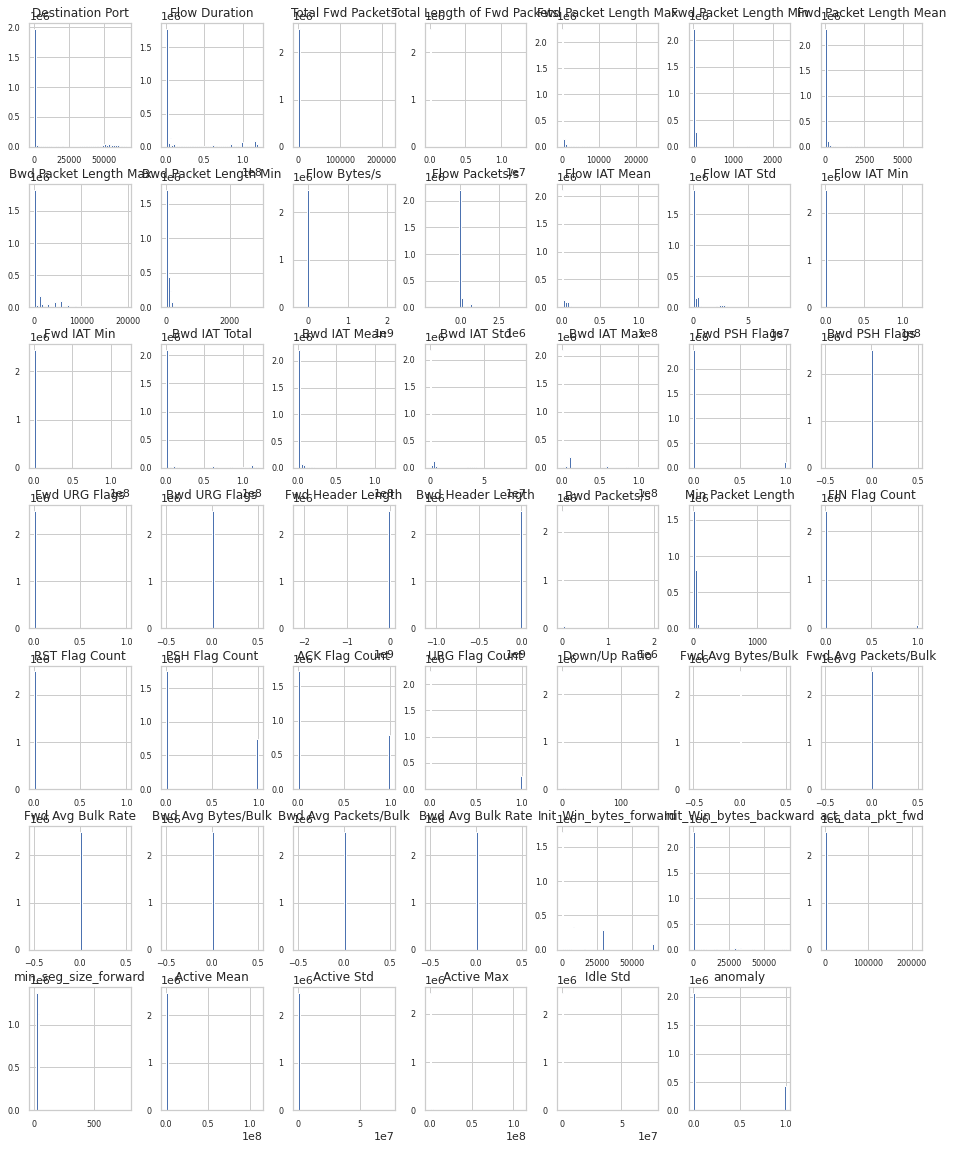

In [ ]:
X_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

#SelectKBest

The SelectKBest class just scores the features using a function (in this case f_classif for classification) and then "removes all but the k highest scoring features"

In [ ]:
df_under = pd.concat([df[df['Label'] != 'BENIGN'], df[df['Label'] == 'BENIGN'].sample(frac=.1, random_state=42)])
print(f'df.shape {df_under.shape} after sampling out most of benign data')

df.shape (783688, 80) after sampling out most of benign data


In [ ]:
y = df_under['Label']
X = df_under.drop(['Label', 'anomaly'],axis=1)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
bestfeatures = SelectKBest(score_func=f_classif, k=40)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(40,'Score'))  #print 10 best features

                          Specs         Score
46               PSH Flag Count  52259.104527
12       Bwd Packet Length Mean  44113.567217
54         Avg Bwd Segment Size  44113.567217
77                     Idle Min  41124.687429
22                  Fwd IAT Std  40910.316774
74                    Idle Mean  40701.335559
41            Packet Length Std  39669.590848
40           Packet Length Mean  39607.549879
10        Bwd Packet Length Max  38991.693943
52          Average Packet Size  38934.302484
76                     Idle Max  38163.216188
13        Bwd Packet Length Std  38122.640764
23                  Fwd IAT Max  37790.673254
18                 Flow IAT Max  37784.878347
39            Max Packet Length  37072.186106
17                 Flow IAT Std  32929.625240
42       Packet Length Variance  28197.142807
20                Fwd IAT Total  27431.287306
1                 Flow Duration  27187.070111
69         min_seg_size_forward  23895.484435
47               ACK Flag Count  2

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [31 33 56 57 58 59 60 61] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [ ]:
feature = pd.DataFrame()
n = len(featureScores['Specs'])
for i in featureScores.nlargest(n//2,'Score')['Specs']:
        feature[i] = df[i]
feature['Label'] = df['Label']

In [ ]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2827876 entries, 0 to 692702
Data columns (total 40 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   PSH Flag Count               int8   
 1   Bwd Packet Length Mean       float32
 2   Avg Bwd Segment Size         float32
 3   Idle Min                     int32  
 4   Fwd IAT Std                  float32
 5   Idle Mean                    float32
 6   Packet Length Std            float32
 7   Packet Length Mean           float32
 8   Bwd Packet Length Max        int16  
 9   Average Packet Size          float32
 10  Idle Max                     int32  
 11  Bwd Packet Length Std        float32
 12  Fwd IAT Max                  int32  
 13  Flow IAT Max                 int32  
 14  Max Packet Length            int16  
 15  Flow IAT Std                 float32
 16  Packet Length Variance       float32
 17  Fwd IAT Total                int32  
 18  Flow Duration                int32  
 19  m

In [ ]:
feature.describe()

,PSH Flag Count,Bwd Packet Length Mean,Avg Bwd Segment Size,Idle Min,Fwd IAT Std,Idle Mean,Packet Length Std,Packet Length Mean,Bwd Packet Length Max,Average Packet Size,Idle Max,Bwd Packet Length Std,Fwd IAT Max,Flow IAT Max,Max Packet Length,Flow IAT Std,Packet Length Variance,Fwd IAT Total,Flow Duration,min_seg_size_forward,ACK Flag Count,Active Mean,Active Min,Min Packet Length,Bwd Packet Length Min,Flow IAT Mean,Fwd IAT Mean,Active Max,Init_Win_bytes_forward,FIN Flag Count,Bwd IAT Mean,Fwd PSH Flags,SYN Flag Count,Total Length of Fwd Packets,Subflow Fwd Bytes,Active Std,Bwd IAT Min,Down/Up Ratio,Flow IAT Min
count,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2827876.0,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06
mean,2.982836e-01,3.052037e+02,3.052037e+02,7.928061e+06,3.269065e+06,8330531.0,2.946027e+02,1.716321e+02,8.717304e+02,1.919704e+02,8.704568e+06,3.353267e+02,9.052107e+06,9.191785e+06,9.513591e+02,2.917187e+06,4.852409e+05,1.449765e+07,1.480065e+07,2.612214e+01,3.153147e-01,8.165874e+04,5.835492e+04,1.644888e+01,4.108922e+01,1.295195e+06,2.609978e+06,1.533378e+05,6.992389e+03,3.528266e-02,1.804992e+06,4.639595e-02,4.639595e-02,5.498522e+02,5.498417e+02,4.117514e+04,9.682420e+05,6.838443e-01,1.625442e+05
std,4.575047e-01,6.044891e+02,6.044891e+02,2.337390e+07,9.648440e+06,23465436.0,6.287870e+02,3.065168e+02,1.947157e+03,3.301270e+02,2.437766e+07,8.471479e+02,2.453990e+07,2.447019e+07,2.029034e+03,7.995902e+06,1.593054e+06,3.358966e+07,3.366750e+07,6.922848e+00,4.646412e-01,6.446744e+05,5.773818e+05,2.524615e+01,6.888118e+01,4.501530e+06,9.464145e+06,1.026333e+06,1.434022e+04,1.844934e-01,8.787885e+06,2.103411e-01,2.103411e-01,9.998639e+03,9.985113e+03,3.919779e+05,8.313137e+06,6.805824e-01,2.951772e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.300000e+01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.300000e+01,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.400000e+01
25%,0.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,6.000000e+00,2.000000e+00,7.750000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.240000e+02,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.550000e+02,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.400000e+01,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
50%,0.000000e+00,7.200000e+01,7.200000e+01,0.000000e+00,0.000000e+00,0.0,2.629068e+01,5.733333e+01,7.900000e+01,7.225000e+01,0.000000e+00,0.000000e+00,4.500000e+01,3.087500e+04,8.700000e+01,1.382763e+02,6.912000e+02,4.500000e+01,3.133800e+04,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,1.155170e+04,3.200000e+01,0.000000e+00,2.510000e+02,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,6.200000e+01,6.200000e+01,0.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
75%,1.000000e+00,1.810000e+02,1.810000e+02,0.000000e+00,6.679077e+04,0.0,1.752712e+02,1.198000e+02,2.820000e+02,1.495000e+02,0.000000e+00,7.850000e+01,9.568515e+05,2.482934e+06,5.320000e+02,6.964387e+05,3.072000e+04,1.259458e+06,3.239368e+06,3.200000e+01,1.000000e+00,0.000000e+00,0.000000e+00,3.600000e+01,7.700000e+01,3.391393e+05,2.096

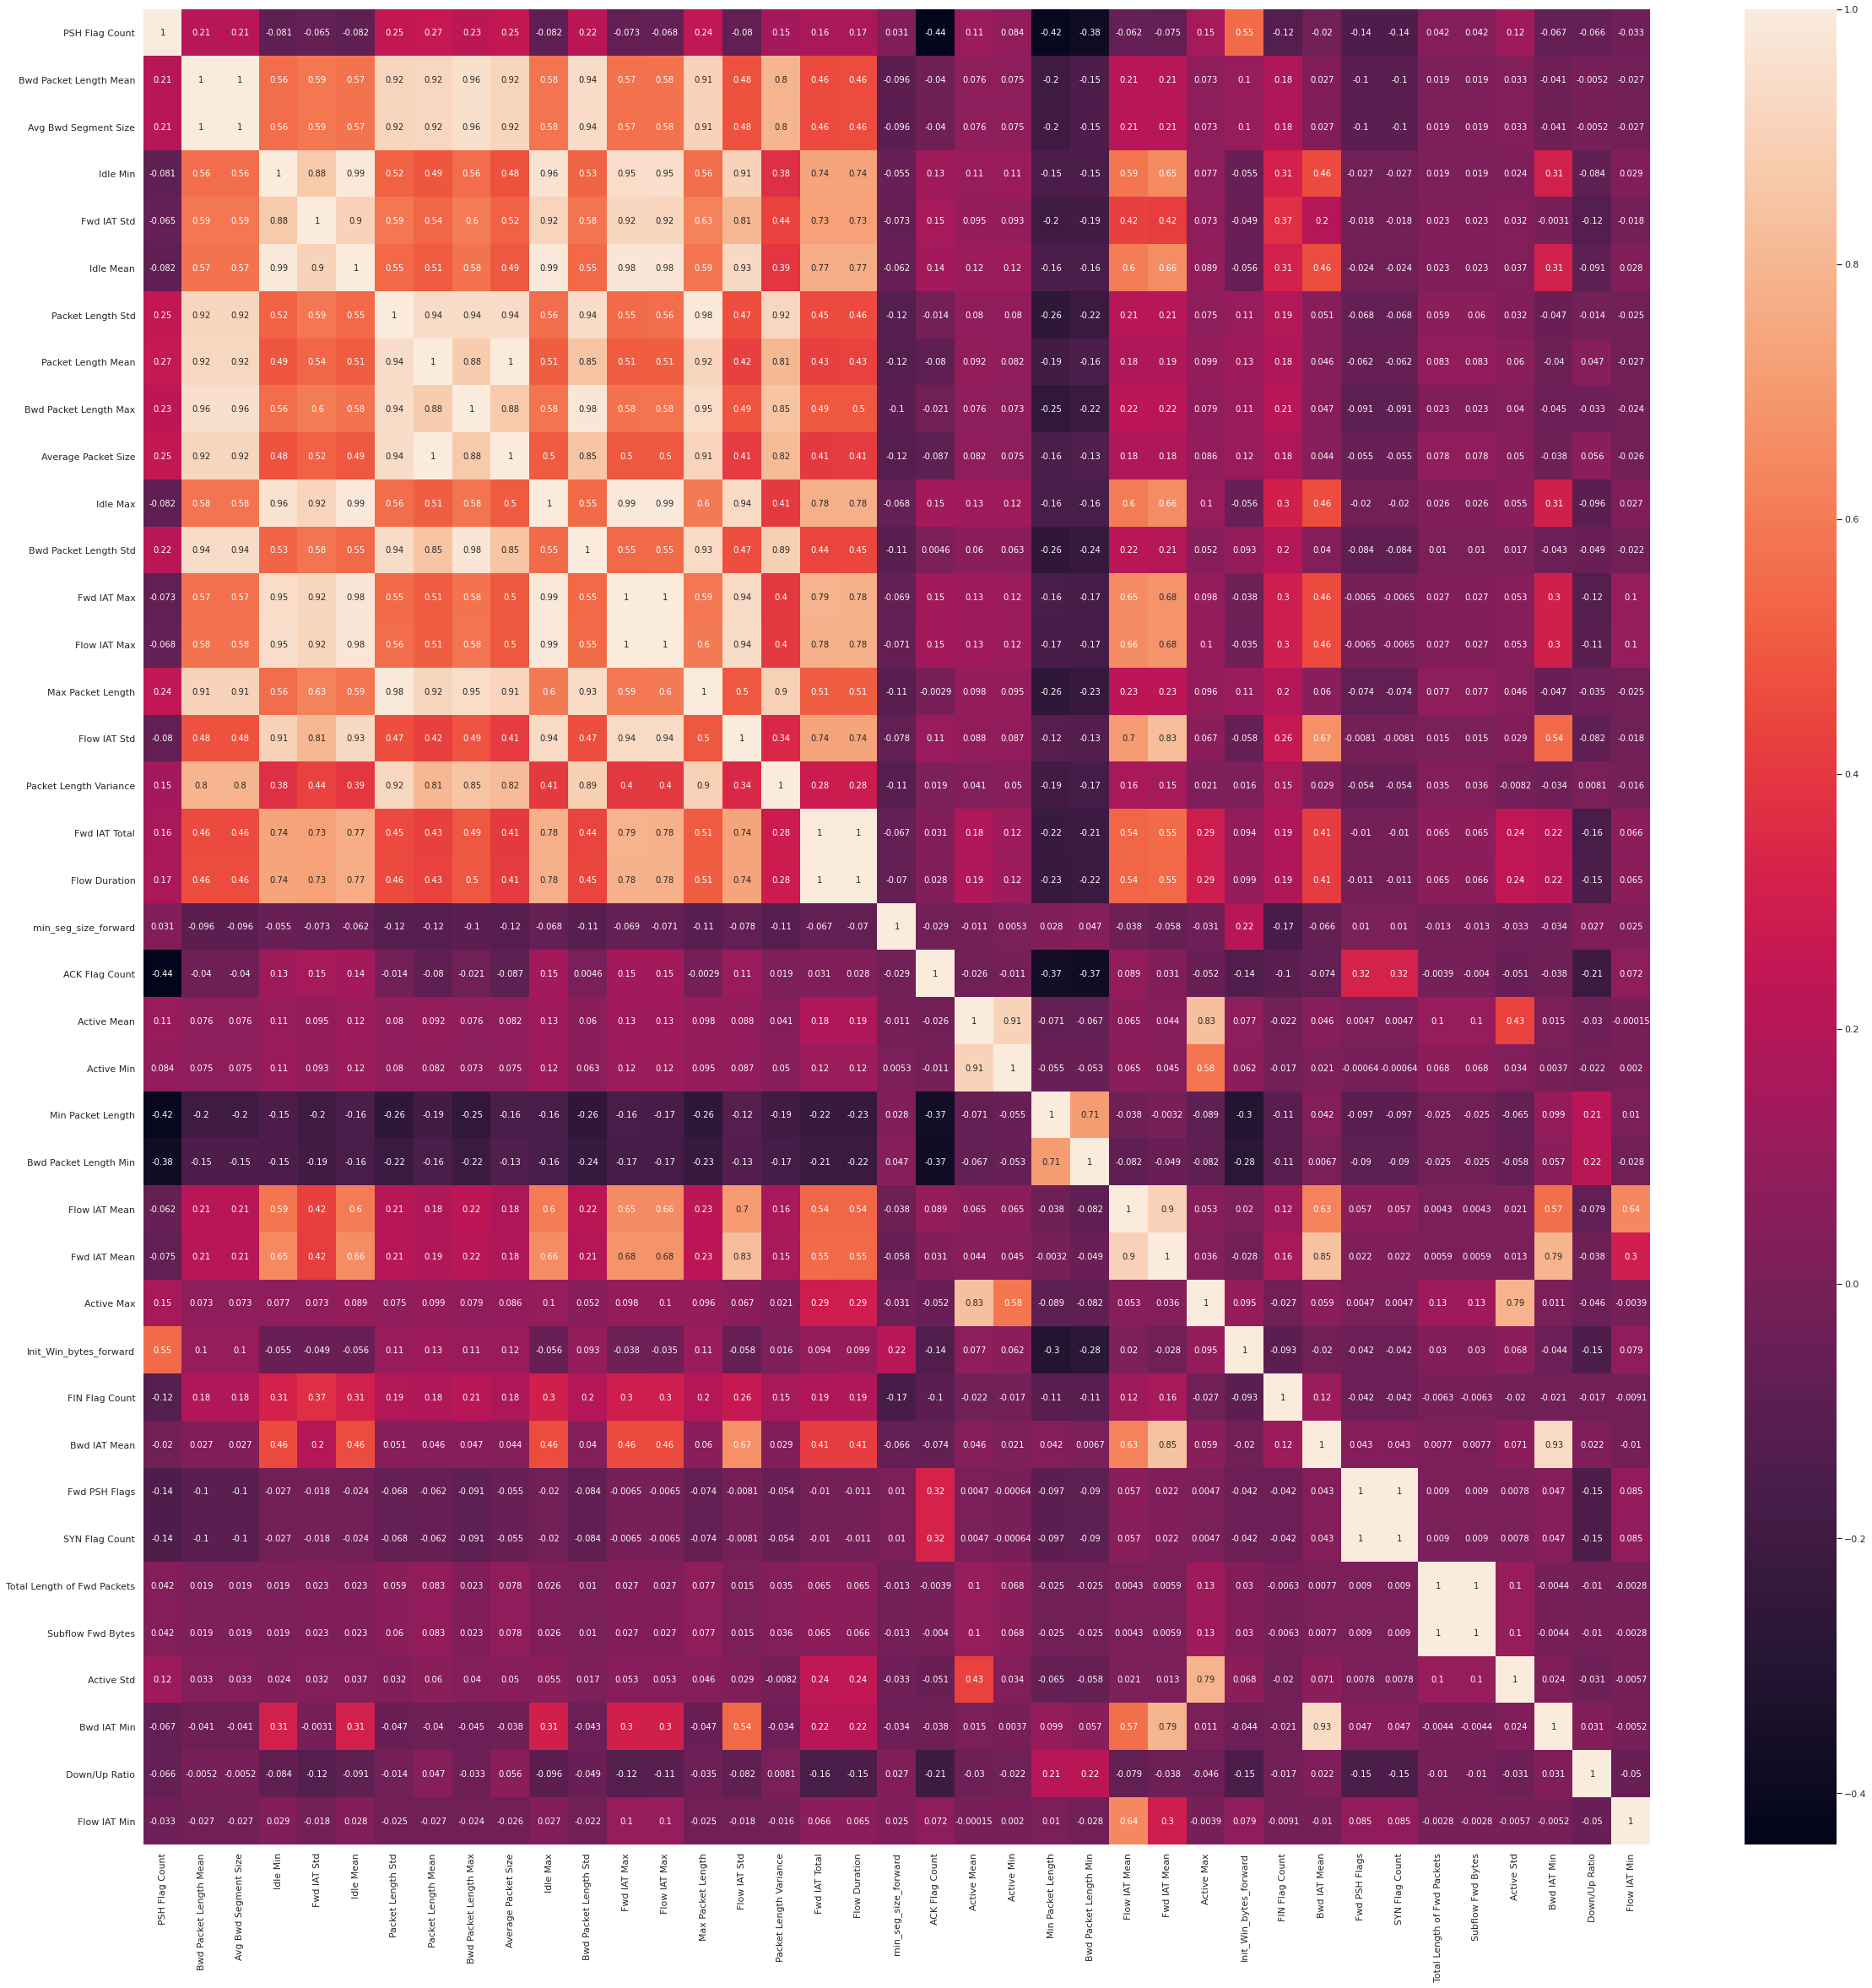

In [ ]:
fig= plt.figure(figsize=(40,40))
sns.heatmap(feature.corr(), annot=True)

In [ ]:
corr = feature.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [ ]:
columns.shape

(40,)

In [ ]:
feature.shape

(2827876, 40)

In [ ]:
selected_columns = feature.columns[columns]
df_K = df[selected_columns]

In [ ]:
df_clean.shape

(2497467, 21)

In [ ]:
df_clean.to_csv('/content/drive/MyDrive/cicids2017 dataset/all_data_SelectK(40)features(21).csv')